In [1]:
import pandas as pd
import numpy as np
import geopandas
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import index_natsorted, natsorted, natsort_keygen

fdata = pd.read_csv('csv/sms-call-internet-mi-2013-11-01.txt', sep='\t',names=['cellid','time','countrycode','smsin','smsout','callin','callout','internet' ])

In [2]:

#fdata.set_index('cellid')
#pd.to_datetime(1383261000000+3600000,unit='ms')

In [3]:
fdata['time']=pd.to_datetime(fdata['time']+3600000, unit='ms') #+3600000 to change timezone
#pd.to_datetime(fdata['time'], infer_datetime_format=True, unit='s')

In [4]:
fdata.head()

,cellid,time,countrycode,smsin,smsout,callin,callout,internet
0,1,2013-11-01 00:00:00,0,0.081363,NaN,NaN,NaN,NaN
1,1,2013-11-01 00:00:00,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,2013-11-01 00:10:00,0,0.136588,NaN,NaN,0.027300,NaN
3,1,2013-11-01 00:10:00,33,NaN,NaN,NaN,NaN,0.026137
4,1,2013-11-01 00:10:00,39,0.278452,0.119926,0.188777,0.133637,11.100963


In [5]:
#fdata.sort_values(by=['time','cellid'])
#o=fdata.reindex(index=order_by_index(fdata.index, index_natsorted(fdata.cellid)))
awa=fdata.sort_values(
    by=["cellid","time"],
    key=natsort_keygen()
)

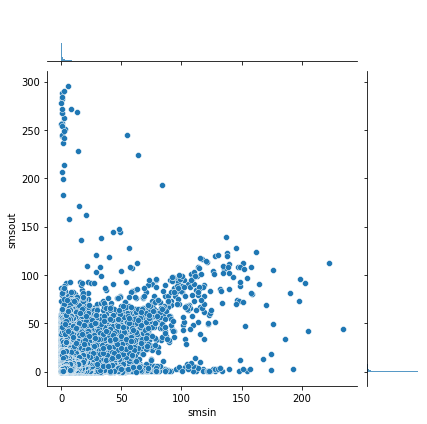

In [6]:
#fdata.sort(['cellid', 'time'])
#fdata.groupby(fdata.cellid.apply(type) != str).apply(lambda g: g.sort_values('cellid')).reset_index(drop = True)
#natsorted(fdata.cellid)
sns.jointplot(data=awa, x='smsin',y='smsout')
#awa.to_csv('sms-call-int-mi-01_1.csv')
#fdata.sort_values(by=['time'])

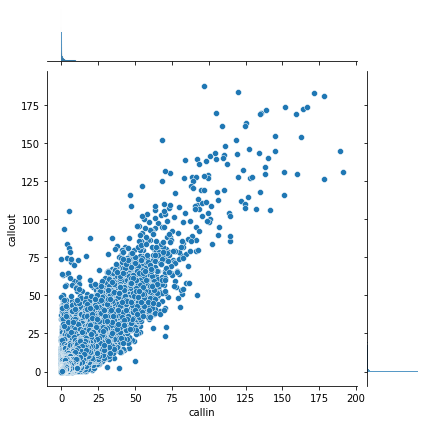

In [8]:
sns.jointplot(data=awa, x='callin',y='callout')
#fdata.loc[fdata.cellid==2]

<AxesSubplot:>

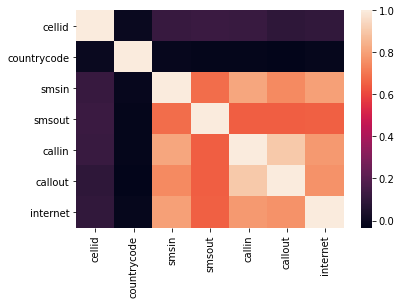

In [9]:
sns.heatmap(awa.corr())